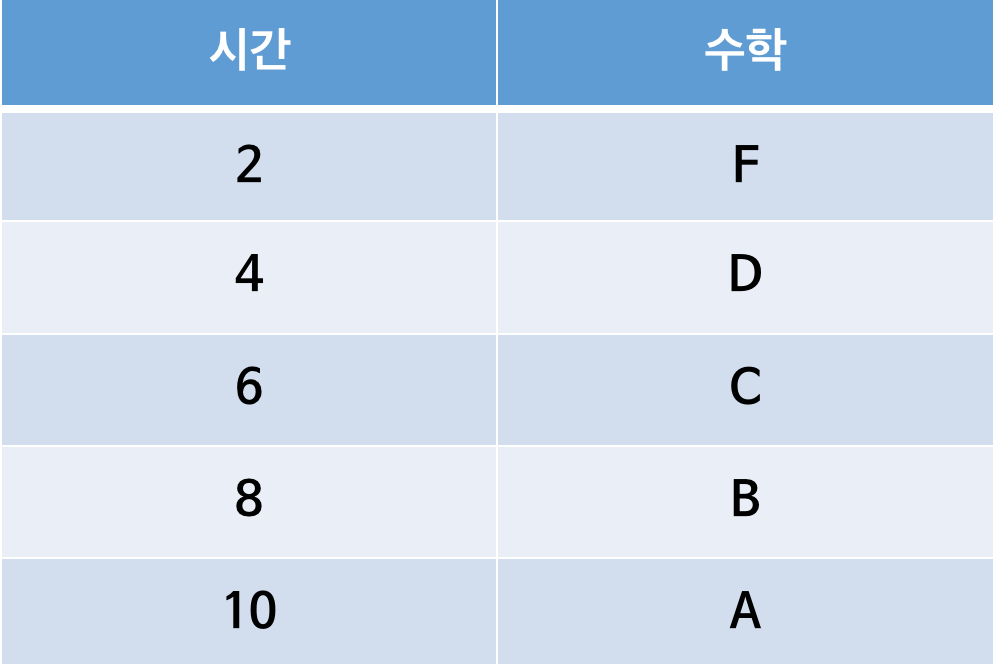

In [1]:
# multi.png 파일 화면에 출력
from IPython.display import Image
Image("img/multi.png", height=300, width=400)

In [2]:
import tensorflow as tf
tf.set_random_seed(777)

In [3]:
x_data=[[2],[4],[6],[8],[10],[2],[4],[6],[8],[10],[2],[4],[6],[8],[10]]
# 멀티 레벨로 응답을 줘야 하기 때문에 one hot encoding
# 한개의 값만 1로 만들어줌
# 00001 : F
# 00010 : D
# 00100 : C
# 01000 : B
# 10000 : A
y_data=[[0,0,0,0,1],[0,0,0,1,0],[0,0,1,0,0],[0,1,0,0,0],[1,0,0,0,0],
        [0,0,0,0,1],[0,0,0,1,0],[0,0,1,0,0],[0,1,0,0,0],[1,0,0,0,0],
       [0,0,0,0,1],[0,0,0,1,0],[0,0,1,0,0],[0,1,0,0,0],[1,0,0,0,0]]

In [4]:
X = tf.placeholder("float",[None,1])
Y = tf.placeholder("float",[None,5])
nb_classes=5 # 분류 번호
W = tf.Variable(tf.random_normal([1,nb_classes]),name="weight")
b = tf.Variable(tf.random_normal([nb_classes]),name="bias")

# tf.nn.softmax() 합이 1이 넘지않게 해준다 
model = tf.nn.softmax(tf.matmul(X,W)+b)
print(model)

Tensor("Softmax:0", shape=(?, 5), dtype=float32)


In [5]:
loss = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(model),axis=1))
print(loss)

Tensor("Mean:0", shape=(), dtype=float32)


In [6]:
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(loss)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [8]:
for step in range(20001):
    sess.run(train, feed_dict={X:x_data,Y:y_data})
    if step % 200 == 0:
        print(step, sess.run(loss, feed_dict={X:x_data,Y:y_data}))


0 4.525798
200 1.1640362
400 0.9955111
600 0.8977858
800 0.82963675
1000 0.77761865
1200 0.7357347
1400 0.70079166
1600 0.6708869
1800 0.6447976
2000 0.62169266
2200 0.6009824
2400 0.5822343
2600 0.56512207
2800 0.5493942
3000 0.53485215
3200 0.52133733
3400 0.5087205
3600 0.49689558
3800 0.48577377
4000 0.4752809
4200 0.4653534
4400 0.45593697
4600 0.44698468
4800 0.43845603
5000 0.43031535
5200 0.4225312
5400 0.4150759
5600 0.40792483
5800 0.40105617
6000 0.39445
6200 0.38808885
6400 0.38195655
6600 0.3760387
6800 0.37032205
7000 0.3647948
7200 0.35944566
7400 0.35426503
7600 0.3492435
7800 0.34437257
8000 0.33964455
8200 0.3350521
8400 0.33058855
8600 0.3262476
8800 0.32202384
9000 0.31791142
9200 0.31390575
9400 0.310002
9600 0.3061957
9800 0.30248287
10000 0.29885972
10200 0.29532254
10400 0.29186794
10600 0.28849283
10800 0.28519413
11000 0.28196907
11200 0.2788148
11400 0.27572885
11600 0.27270898
11800 0.26975262
12000 0.2668578
12200 0.26402256
12400 0.26124457
12600 0.2585224

In [9]:
a = sess.run(model, feed_dict={X:[[3]]})
print(a, sess.run(tf.arg_max(a,1)))

Instructions for updating:
Use `argmax` instead
[[4.1023437e-10 1.3569230e-05 8.4840544e-03 5.6268924e-01 4.2881322e-01]] [3]


In [10]:
# [[0.0016402  0.02109916 0.12627508 0.43637192 0.4146137 ]] [3]
# 0 0 0 1 0
print("3시간 공부하면 D학점을 받게 된다")

3시간 공부하면 D학점을 받게 된다


In [11]:
# 15시간 공부하면 어떤 학점을 받게 될까?
b = sess.run(model, feed_dict={X:[[15]]})
print(b, sess.run(tf.arg_max(b,1)))

[[9.9997997e-01 1.9972493e-05 3.5907718e-11 1.3019398e-20 4.7804916e-38]] [0]


In [12]:
# [[9.631234e-01 3.615644e-02 7.189964e-04 1.268738e-06 2.288773e-14]] [0]
# 1 0 0 0 0
print("15시간 공부하면 A학점을 받게 된다")

15시간 공부하면 A학점을 받게 된다


In [13]:
# 동시에 여러개  15, 2, 6, 7, 11 공부하면?
# 어떤 학점을 받게 되나?

all = sess.run(model, feed_dict={X:[[15],[2],[6],[7],[11]]})
print(all, sess.run(tf.arg_max(all,1)))

[[9.9997997e-01 1.9972493e-05 3.5907718e-11 1.3019398e-20 4.7804916e-38]
 [1.2560591e-13 2.4366335e-08 7.8453639e-05 4.5164783e-02 9.5475674e-01]
 [1.0082471e-03 1.6531761e-01 7.5690985e-01 7.6761581e-02 2.7407114e-06]
 [1.8482735e-02 5.1672721e-01 4.5942235e-01 5.3677247e-03 6.9090351e-09]
 [9.7688669e-01 2.3084050e-02 2.9185354e-05 6.0069713e-11 1.3059034e-22]] [0 4 2 1 0]


In [14]:
# [ 0 4 2 1 0 ]
# 15 => 0 : A
# 2  => 4 : F
# 6  => 2 : C
# 7  => 1 : B
# 11 => 0 : A